In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow.keras.utils as ku
import matplotlib.pyplot as plt

In [2]:
# Sample data: Tourist spots and their genres
places = [
    'The Louvre', 'Eiffel Tower', 'Central Park', 'Smithsonian Museum', 'Grand Canyon', 'Prado Museum',
    'Colosseum', 'Statue of Liberty', 'Machu Picchu', 'Taj Mahal', 'Great Wall of China', 'Sydney Opera House',
    'Mount Everest', 'Banff National Park', 'Alcatraz Island', 'Versailles Palace', 'Mount Fuji', 'Stonehenge',
    'Sagrada Familia', 'Mount Rushmore'
]

descriptions = {
    'The Louvre': 'A historic art museum in Paris that houses thousands of years of art history.',
    'Eiffel Tower': 'An iconic landmark in Paris with a rich historical background.',
    'Central Park': 'A large urban park offering green spaces and recreational activities.',
    'Smithsonian Museum': 'A museum in Washington D.C. showcasing American history and culture.',
    'Grand Canyon': 'A historical natural landmark in the USA known for its massive scale and beauty.',
    'Prado Museum': 'A museum in Madrid known for its collection of European art.',
    'Colosseum': 'An ancient Roman amphitheater in the center of Rome, Italy.',
    'Statue of Liberty': 'A colossal neoclassical sculpture on Liberty Island in New York Harbor.',
    'Machu Picchu': 'An ancient Inca city located in the Andes Mountains in Peru.',
    'Taj Mahal': 'A white marble mausoleum in India, symbolizing eternal love.',
    'Great Wall of China': 'A series of fortifications built along the northern borders of China.',
    'Sydney Opera House': 'An iconic performing arts center in Sydney, Australia.',
    'Mount Everest': 'The highest mountain in the world, located in the Himalayas.',
    'Banff National Park': 'A beautiful national park in Canada, known for its stunning lakes and mountains.',
    'Alcatraz Island': 'A small island in San Francisco Bay, known for its former prison.',
    'Versailles Palace': 'A royal château in France known for its opulent architecture and gardens.',
    'Mount Fuji': 'An active stratovolcano and Japan’s highest peak.',
    'Stonehenge': 'A prehistoric monument consisting of standing stones in Wiltshire, England.',
    'Sagrada Familia': 'A basilica in Barcelona, Spain, designed by architect Antoni Gaudí.',
    'Mount Rushmore': 'A massive sculpture of four U.S. presidents carved into the Black Hills of South Dakota.'
}

# Genres associated with each place
genres = ['Historical', 'Museum', 'Park', 'Natural Landmark', 'Monument', 'Religious Site']

# Mapping places to genres (example data)
place_genre_mapping = {
    'The Louvre': 'Museum',
    'Eiffel Tower': 'Monument',
    'Central Park': 'Park',
    'Smithsonian Museum': 'Museum',
    'Grand Canyon': 'Natural Landmark',
    'Prado Museum': 'Museum',
    'Colosseum': 'Historical',
    'Statue of Liberty': 'Monument',
    'Machu Picchu': 'Historical',
    'Taj Mahal': 'Monument',
    'Great Wall of China': 'Historical',
    'Sydney Opera House': 'Monument',
    'Mount Everest': 'Natural Landmark',
    'Banff National Park': 'Park',
    'Alcatraz Island': 'Historical',
    'Versailles Palace': 'Historical',
    'Mount Fuji': 'Natural Landmark',
    'Stonehenge': 'Historical',
    'Sagrada Familia': 'Religious Site',
    'Mount Rushmore': 'Monument'
}
# Combine all text for tokenization and training
all_descriptions = list(descriptions.values())

In [3]:
# Tokenizer initialization
tokenizer = Tokenizer()
corpus = list(descriptions.values())  # Only descriptions of the places

# Fit tokenizer on the text corpus
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1  # Adding 1 because tokenizer index starts from 1

# Create input sequences (n-gram sequences)
input_sequences = []
for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

# Pad sequences to ensure uniform length
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# Prepare predictors (X) and labels (y)
predictors = [descriptions[place] for place in places]
# Tokenize predictors (input descriptions of places)
predictors_sequences = tokenizer.texts_to_sequences(predictors)
predictors_padded = pad_sequences(predictors_sequences, maxlen=max_sequence_len, padding='pre')

# Labels: Convert genre labels to numerical values
labels = [place_genre_mapping[place] for place in places]
labels_encoded = ku.to_categorical([genres.index(genre) for genre in labels], num_classes=len(genres))

In [26]:
# Define the model
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))  # Embedding layer
model.add(Bidirectional(LSTM(150, return_sequences=True)))  # LSTM layer
model.add(Dropout(0.2))  # Dropout layer
model.add(LSTM(100))  # Another LSTM layer
model.add(Dense(128, activation='relu'))  # Dense layer
model.add(Dense(64, activation='relu'))
model.add(Dense(len(genres), activation='softmax'))  # Output layer with softmax

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [27]:
# Train the model
history = model.fit(predictors_padded, labels_encoded, epochs=70, batch_size=1, verbose=1)

Epoch 1/70
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 40ms/step - accuracy: 0.2933 - loss: 1.7915
Epoch 2/70
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.1227 - loss: 1.7325
Epoch 3/70
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.2851 - loss: 1.6493
Epoch 4/70
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.2197 - loss: 1.6092
Epoch 5/70
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.4522 - loss: 1.2819
Epoch 6/70
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.5701 - loss: 1.2619
Epoch 7/70
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.3127 - loss: 1.2751
Epoch 8/70
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step - accuracy: 0.6388 - loss: 0.9117
Epoch 9/70
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - accuracy: 0.6281 - loss: 0.9106
Epoch 10/70
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.6950 - loss: 0.6122
Epoch 11/70
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.8619 - loss: 0.3266
Epoch 12/70
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy:

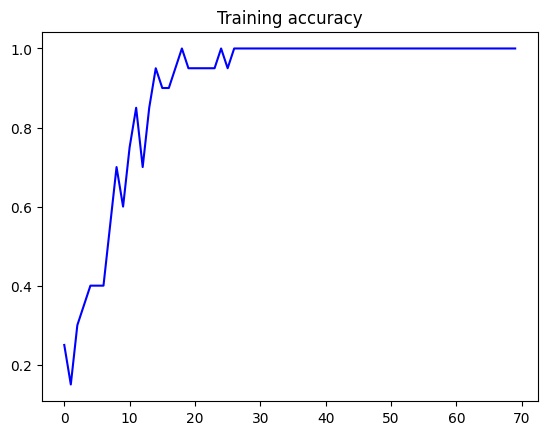

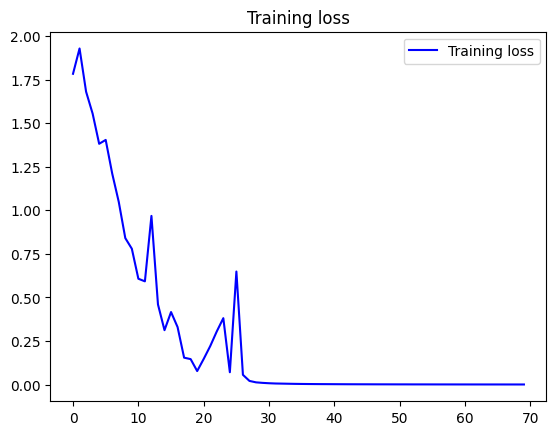

In [28]:
# Plot training accuracy and loss
acc = history.history['accuracy']
loss = history.history['loss']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss')
plt.title('Training loss')
plt.legend()
plt.show()

In [29]:
# Sample prediction based on a user's description
def recommend_genre(user_description):
    token_list = tokenizer.texts_to_sequences([user_description.lower()])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted_probs = model.predict(token_list, verbose=0)
    predicted_index = np.argmax(predicted_probs)

    # Genres list
    genre = genres[predicted_index]
    return genre

In [30]:
# Example user descriptions for testing
user_descriptions = {
    'User1': "I enjoy walking through lush gardens and relaxing in green spaces.",
    'User2': "I love learning about ancient civilizations and exploring historical ruins.",
    'User3': "Visiting museums to see art and antiques is my favorite hobby.",
    'User4': "I love going on adventures to natural wonders like mountains and waterfalls.",
    'User5': "I prefer exploring architectural masterpieces and historical landmarks."
}

# Convert descriptions to sequences using tokenizer
user_sequences = tokenizer.texts_to_sequences(user_descriptions.values())
user_sequences = pad_sequences(user_sequences, padding='post')

# Predict genres based on user descriptions
predictions = model.predict(user_sequences)

# Output the predicted genres for each user
for i, (user_name, user_desc) in enumerate(user_descriptions.items()):
    prediction = predictions[i]
    predicted_genre_index = np.argmax(prediction)
    # Check if predicted_genre_index is within the valid range of genres
    if predicted_genre_index < len(genres):
        predicted_genre = genres[predicted_genre_index]
        print(f"User: {user_name} \nDescription: '{user_desc}' \nPredicted Genre: {predicted_genre}\n")
    else:
        print(f"User: {user_name} \nDescription: '{user_desc}' \nPredicted Genre: Out of range (index: {predicted_genre_index})\n")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step
User: User1 
Description: 'I enjoy walking through lush gardens and relaxing in green spaces.' 
Predicted Genre: Park

User: User2 
Description: 'I love learning about ancient civilizations and exploring historical ruins.' 
Predicted Genre: Natural Landmark

User: User3 
Description: 'Visiting museums to see art and antiques is my favorite hobby.' 
Predicted Genre: Park

User: User4 
Description: 'I love going on adventures to natural wonders like mountains and waterfalls.' 
Predicted Genre: Natural Landmark

User: User5 
Description: 'I prefer exploring architectural masterpieces and historical landmarks.' 
Predicted Genre: Religious Site

